In [19]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import random

In [3]:
import nltk
import os

# Set the custom download path for NLTK data
custom_download_path = '/kaggle/working/nltk_data'

# Make sure the directory exists; if not, create it
os.makedirs(custom_download_path, exist_ok=True)

# Append the custom download path to NLTK data path
nltk.data.path.append(custom_download_path)

# Download NLTK resources to the custom path
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [5]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Read the CSV Files

In [25]:
data=pd.read_csv("/kaggle/input/genre-classification-dataset/train_data.csv", sep=",", on_bad_lines='skip')

In [9]:
df1=pd.read_csv("/kaggle/input/genre-classification-dataset/test_data.csv", sep=",", on_bad_lines='skip')

In [18]:
df2=pd.read_csv("/kaggle/input/genre-classification-dataset/test_data_solution.csv", sep=",", on_bad_lines='skip')

### Check the top 5 rows

In [26]:
data.head()

,Unnamed: 0,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [20]:
df1.head()

,,1 ::: Edgar's Lunch (1998) ::: L.R. Brane loves his life - his car,his apartment,his job,but especially his girlfriend,Vespa. One day while showering,Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more,a quick trip of no more than a few minutes. When he returns,Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.
2 ::: La guerra de papá (1977) ::: Spain,March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth,he feels he has lost the privileged position ...,with his brother Juan,who is eight years old and is quite disobedient,spend their time committing prank after prank,causing the resulting anger of his mother,the nanny and the old housemaid. The rest of ...,his resigned mother and a retrograde father o...,and the civil war that won the despot Don Pab...
3 ::: Off the Beaten Track (2010) ::: One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style,this documentary follows their day to day routines,and their struggle to adapt to a new world wh...,Romania has been facing,like several other Eastern European countries,the pressure of modern values,introducing in farmer's lives the cruel notio...,the temptation of migrating to the higher sal...,and the marginalization of locally produced f...,NaN
4 ::: Meu Amigo Hindu (2015) ::: His father has died,he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness,which is making him lose his friends and fami...,otherwise he'll die. He gets married to a bea...,Livia,just before going to Seattle to get treatment...,he undergoes numerous medical procedures. Dur...,he meets an Hindu boy,with whom he plays and whom he tells amazing ...,Diego gets a visit from a very uncommon man.
5 ::: Er nu zhai (1955) ::: Before he was known internationally as a martial arts superstar,Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955),a.k.a. We Owe it to Our Children from the Uni...,a family melodrama written and directed by re...,the B&W film revolves around accountant Ming ...,not knowing that she's the daughter given up ...,NaN,NaN,NaN,NaN
6 ::: Riddle Room (2016) ::: Emily Burns is being held captive in a room with no idea as to why or how she got there. Determined to escape and return to her daughter and husband,Emily discovers clues within the room that help explain what she's doing there. They even provide clues about who she is...but will they help her escape?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df2.head()

,Unnamed: 0,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


### DataSet Shape

In [33]:
data.shape

(54214, 4)

In [34]:
df1.shape

(43437, 8)

In [35]:
df2.shape

(54200, 4)

## Major

In [30]:
df=pd.concat((data,df2))

In [31]:
df.columns=['id','Title','Genre','Description']

In [32]:
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


### Check Duplicated Values

In [38]:
df.duplicated().sum() # will give as a number is duplicated

0

### Chech Null Values

In [40]:
df.isnull().sum() # check for any null values

id             0
Title          0
Genre          0
Description    0
dtype: int64

In [42]:
df.columns

Index(['id', 'Title', 'Genre', 'Description', 'words', 'sentences'], dtype='object')

In [47]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [48]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [49]:
df["Despcription_clean"] =  df["Description"].apply(preprocessing)
df.head()

,id,Title,Genre,Description,words,sentences,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,default value,default value,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,default value,default value,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,default value,default value,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,default value,default value,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,default value,default value,films title refers unrecovered bodies ground z...


In [50]:
df['Genre'].value_counts()

Genre
drama           27225
documentary     26192
comedy          14893
short           10145
horror           4408
thriller         3181
action           2629
western          2064
reality-tv       1767
family           1567
adventure        1550
music            1462
romance          1344
sci-fi           1293
adult            1180
crime            1010
animation         996
sport             863
talk-show         782
fantasy           645
mystery           637
musical           553
biography         529
history           486
game-show         387
news              362
war               264
Name: count, dtype: int64

In [53]:
genre=df['Genre'].unique()

### Data Visualization 

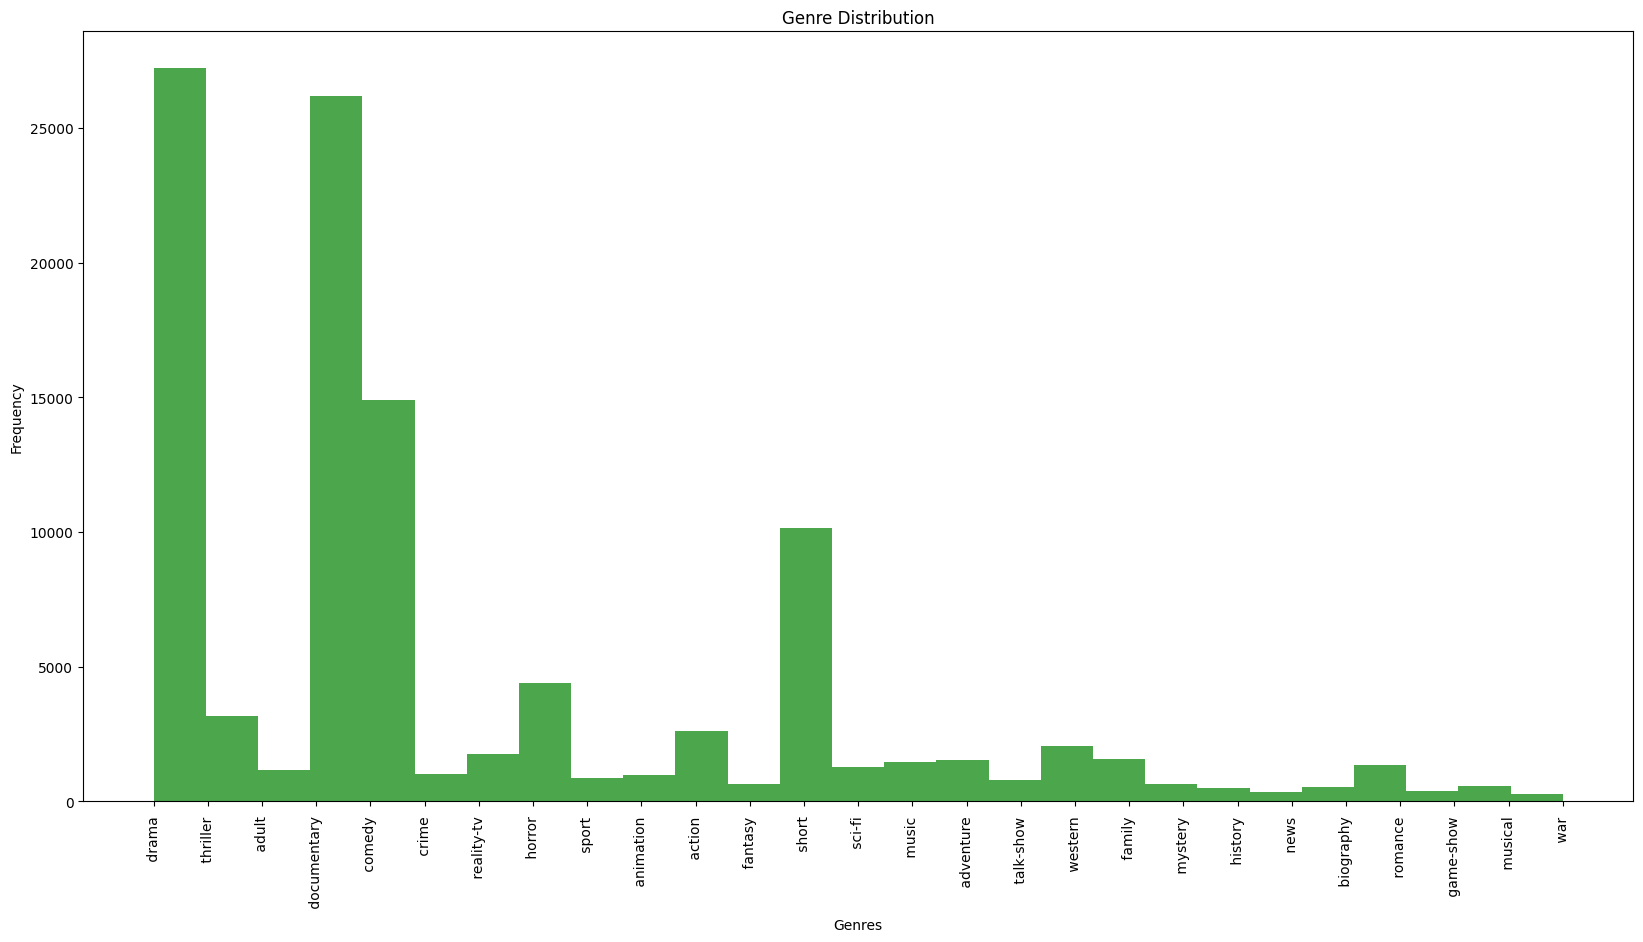

In [58]:
plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='green', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

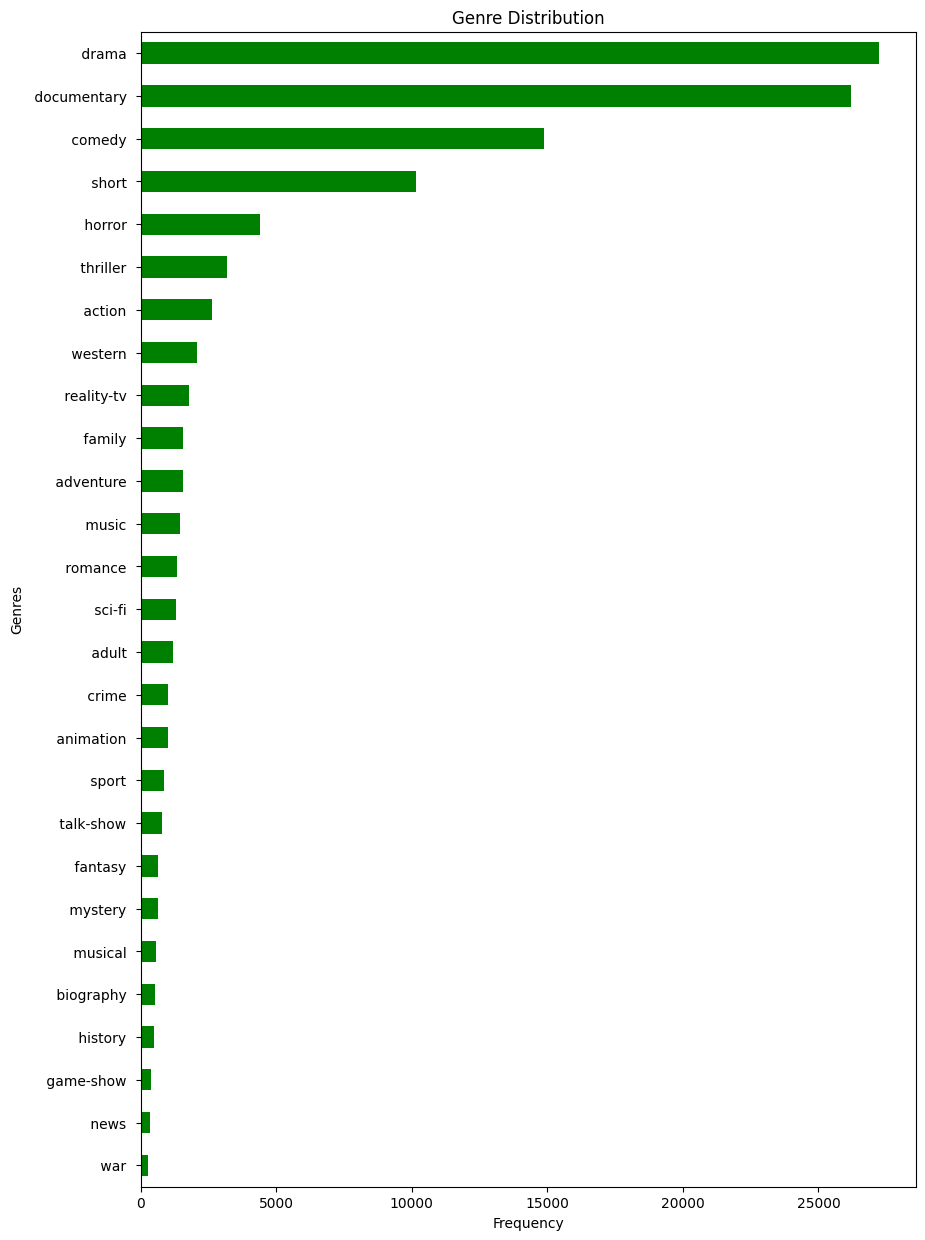

In [61]:
genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
# Create a horizontal histogram of genre distribution
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "green", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

In [65]:
data = df.drop(["Title","id"] , axis = 1) # will drop column 
data.head()

,Genre,Description,words,sentences,Despcription_clean
0,drama,Listening in to a conversation between his do...,default value,default value,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,default value,default value,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,default value,default value,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,default value,default value,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,default value,default value,films title refers unrecovered bodies ground z...


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

### Encoding

In [69]:
#we do the labelencoding with categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

0         8
1        24
2         1
3         8
4         8
         ..
54195    13
54196    26
54197     1
54198     8
54199     8
Name: Genre_encoded, Length: 108414, dtype: int64

### Feature Selection

In [70]:
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5,random_state=42)

### CountVectorizer

In [74]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  Cvectorize.transform(x_test)

### TfidfVectorizer

In [77]:
tfidf_vectorizer =TfidfVectorizer()
x_train1 = tfidf_vectorizer.fit_transform(x_train)
x_test1 =  tfidf_vectorizer.transform(x_test)

### LogisticRegression

In [80]:
lr = LogisticRegression()
lr.fit(x_train1 ,y_train)

LogisticRegression()

In [86]:
print("lr Score on Training data",lr.score(x_train1 ,y_train))
print("lr Score on Training data",lr.score(x_test1 ,y_test))

lr Score on Training data 0.7109044957293339
lr Score on Training data 0.5907908572693563


#### Prediction

In [82]:
y_pred=lr.predict(x_test1)

#### Accuracy

In [89]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5907908572693563

#### Confusion Matrix

In [87]:
print(confusion_matrix(y_test, y_pred))


[[  365     2     2     2     0   143     2   178   469     1     0     0
      0    35     0     0     0     0     2     1    19    41    13     0
     32     0     5]
 [    1   133    34     0     0   175     0    52   135     1     0     0
      0     7     0     0     0     0     1     1     0    37     1     0
      0     0     1]
 [   30    25   124     2     0   102     0   142   252     6     0     2
      0    36     0     0     0     0     3     0     8    22     0     0
      4     0     5]
 [   26     0     8    14     0   143     0    79   112    19     1     0
      0    13     2     0     0     0     0     0    26    46     0     0
      1     0     0]
 [    0     0     0     0     0     7     1   175    48     0     0     0
      0     1     0     0     0     0     0     0     0     5     0     1
      0     0     0]
 [   39     6     1     1     0  4495     5   479  2100    11     0     1
      0    65     6     0     0     1    10     6    10   187     2    14
      8

#### Classifiction = precision,recall,F1-score

In [99]:
CM=classification_report(y_pred ,y_test)
CM

'               precision    recall  f1-score   support\n\n      action        0.35      0.43      0.39      1048\n       adult        0.37      0.63      0.47       337\n   adventure        0.25      0.51      0.34       376\n   animation        0.13      0.42      0.20       156\n   biography        0.00      0.00      0.00         9\n      comedy        0.60      0.55      0.57      8048\n       crime        0.05      0.22      0.08       112\n documentary        0.84      0.70      0.76     15772\n       drama        0.72      0.57      0.64     17206\n      family        0.17      0.43      0.24       307\n     fantasy        0.06      0.34      0.10        61\n   game-show        0.59      0.79      0.67       139\n     history        0.01      0.22      0.01         9\n      horror        0.65      0.61      0.63      2330\n       music        0.51      0.62      0.56       601\n     musical        0.06      0.31      0.10        51\n     mystery        0.07      0.34      0.11 

### Suppoty Vector Classifier

In [90]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)

LinearSVC()

### Check  the trainin score and testing score

In [91]:
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Training data",svm.score(x_test1 ,y_test))

Model Score on Training data 0.9803715387311602
Model Score on Training data 0.5904403490324128


#### Predict

In [92]:
y_pred=svm.predict(x_test1)

#### Accuracy

In [100]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5904403490324128

In [98]:
CM=confusion_matrix(y_test, y_pred)
CM

array([[  455,     5,    18,    10,     0,   125,    15,   106,   338,
            6,     4,     1,     1,    52,     2,     0,     2,     0,
            1,     5,    37,    47,    23,     1,    50,     1,     7],
       [   10,   213,    47,     0,     0,   115,     1,    27,   106,
            0,     0,     0,     0,     7,     2,     0,     0,     0,
            2,     1,     1,    38,     2,     0,     4,     0,     3],
       [   33,    27,   191,    13,     0,    79,     2,    97,   187,
           10,     4,     1,     0,    36,     0,     0,     1,     0,
           10,     0,    15,    33,     2,     1,    11,     2,     8],
       [   26,     0,    13,    66,     0,   110,     1,    43,    87,
           34,     9,     0,     0,    13,     2,     1,     0,     0,
            0,     0,    26,    53,     1,     3,     1,     0,     1],
       [    1,     1,     0,     0,     0,    14,     1,   152,    47,
            0,     1,     0,     0,     0,     3,     0,     0,     0,
  

#### Classification of the Precision,recall,F1-score

In [93]:
print(classification_report(y_pred ,y_test))

               precision    recall  f1-score   support

      action        0.35      0.43      0.39      1048
       adult        0.37      0.63      0.47       337
   adventure        0.25      0.51      0.34       376
   animation        0.13      0.42      0.20       156
   biography        0.00      0.00      0.00         9
      comedy        0.60      0.55      0.57      8048
       crime        0.05      0.22      0.08       112
 documentary        0.84      0.70      0.76     15772
       drama        0.72      0.57      0.64     17206
      family        0.17      0.43      0.24       307
     fantasy        0.06      0.34      0.10        61
   game-show        0.59      0.79      0.67       139
     history        0.01      0.22      0.01         9
      horror        0.65      0.61      0.63      2330
       music        0.51      0.62      0.56       601
     musical        0.06      0.31      0.10        51
     mystery        0.07      0.34      0.11        62
        n

#### Check the corelation